In [43]:
import os
import numpy as np
from parse import parse
import matplotlib.pyplot as plt

## Read true data

In [108]:
mapfile = os.path.join('..', 'Documentation', 'Maps', 'TrueMap1')
truemap = []
with open(mapfile, 'r') as f:
    for _ in range(5):
        f.readline()
    for l in f:
        l = " ".join(l)
        l = l.replace('.', '0')
        l = l.replace('#', '63')
        l = l.replace('/', '0')
        l = l.replace('-', '0')
        l = l.replace('|', '0')
        l = l.replace('\\', '0')
        truemap.append(np.array(l.split(), dtype=np.int32))
truemap = np.array(truemap)
truemap

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 63, 63, 63, 63, 63,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 63, 63, 63, 63, 63,  0,  0,  0,  0,  0,  0,  0,  0,
        63, 63, 63,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 63, 63, 63, 63, 63,  0,  0,  0,  0,  0,  0,  0,  0,
        63, 63, 63,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 

## Read data in

In [2]:
datapath = os.path.join('..', 'data')
datafolders = os.listdir(datapath)

In [110]:
currdatapath = os.path.join(datapath, datafolders[0]) # <- just read in one set
datafiles = os.listdir(currdatapath)
mapfile = os.path.join(currdatapath, 'map.map')

times = []
mapstime = []
with open(mapfile, 'r') as file:
    for line in file:
        if 'Map' in line:
            mapname, h, m, s = parse('{}-{}-{}-{}', line)
            if mapname == 'HumanMap':
                continue
            times.append((h , m, s))
            mp = []
            for i in range(25):
                matline = file.readline()
                matline = matline.replace('!', '-')
                mp.append(np.array(matline.split(), dtype=np.int32))
            
            mp = np.array(mp)
            mapstime.append(mp)
mapstime = np.array(mapstime)

In [111]:
mapstime.shape

(18, 25, 25)

## Plot the maps

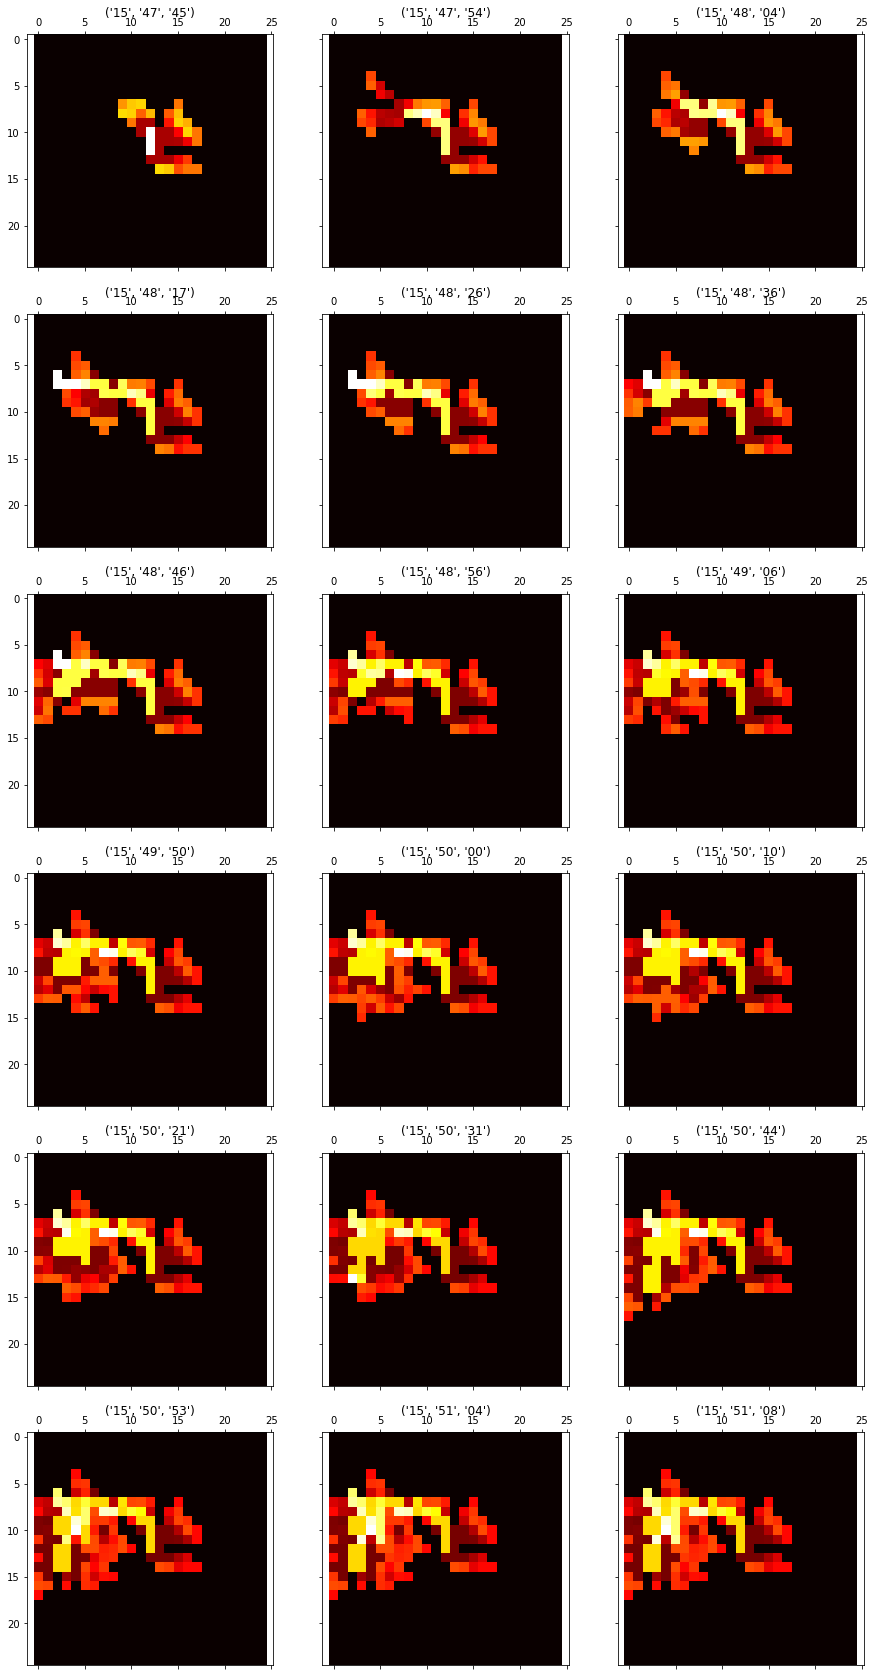

In [112]:
fig, ax = plt.subplots(6,3 , sharex='col', sharey='row', figsize=(15, 30))
for i in range(6):
    for j in range(3):
        ax[i, j].set_title(str(times[i*3 + j]))
        ax[i, j].matshow(mapstime[i*3 + j], cmap='hot', interpolation='none')
plt.show()

## Compute Metrics

### Coverage

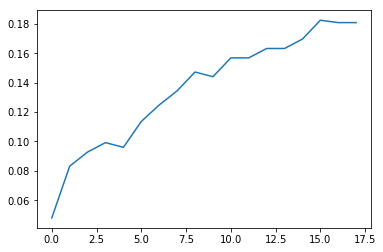

In [155]:
tmp = mapstime.copy()

res = []
for tmp in mapstime.copy():
    map_size = tmp.size
    covered = tmp[tmp > 0].shape[0]
    res.append(covered/map_size)
res = np.array(res)
plt.figure()
plt.plot(res)
plt.show()


### Coverage Accuracy on Visible locations

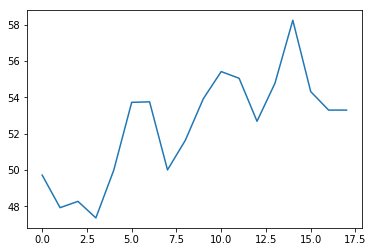

In [172]:
def coverage_accuract(mapstime, truemap):
tmp = mapstime.copy()
res = []
for tmp in mapstime:
    tmp[tmp > 100] -= 100
    seen_locs = np.where(tmp > 0)
    diff = tmp[seen_locs] - truemap[seen_locs]
    rmse = np.sqrt(np.mean(np.power(diff, 2)))
    res.append(rmse)
res = np.array(res)
plt.figure()
plt.plot(res)
plt.show()